In [8]:
import numpy as np
N = 1500 
mean1 = [6, 14] 
mean2 = [10, 6] 
mean3 = [14, 14] 
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance 
np.random.seed(50) 
X = np.random.multivariate_normal(mean1, cov, int(N/6)) 
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6)))) 
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6)))) 
X = np.concatenate((X, 20*np.random.rand(int(N/2),2))) 
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

In [9]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [10]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

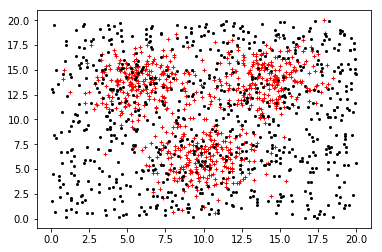

In [11]:
import matplotlib.pyplot as plt
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

Text(0, 0.5, 'Accuracy')

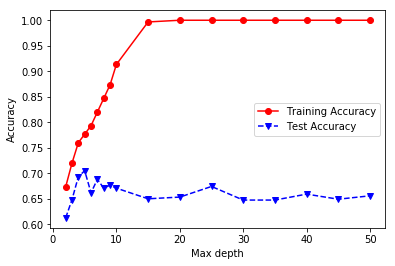

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [15]:
print(testAcc)

[0.6125     0.64833333 0.69333333 0.705      0.66166667 0.68833333
 0.67083333 0.67666667 0.67083333 0.65       0.65333333 0.67416667
 0.6475     0.6475     0.65916667 0.64916667 0.65583333]


In [16]:
print(np.mean(testAcc))

0.6625980392156863
